<a href="https://colab.research.google.com/github/dsercam/TC033/blob/main/TC4033_Activity2b_Group44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='darkorange'><b> TC 5033 :: Advanced Machine Learning Methods </b> </font>
### <font color='darkgray'><b> Activity 2b: Building a CNN for *CIFAR10 Dataset* with PyTorch </b></font></br></br>
###<font color='darkblue'><b>  Group 44 </b></font>
***Dante Rodrigo Serna Camarillo A01182676***</br>
***Axel Alejandro Tlatoa Villavicencio A01363351***</br>
***Carlos Roberto Torres Ferguson A01215432***</br>
***Felipe de Jesús Gastélum Lizárraga A01114918***

# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#only if you have jupyterthemes - Commented this out as we are running this at colab.....
#from jupyterthemes import jtplot
#jtplot.style()

### Download Cifar10 dataset

In [4]:
torch.cuda.is_available()

False

### <font color="darkblue"> **1. Data set download** </font>
>>Data sets files will be saved at the *CIFAR10* folder</br>
>>> *Training* data set will have be 50,000 samples in size</br>
>>> *Validation* data set will have be 50,000 samples in size</br>
>>> *Testing* data set will have be 50,000 samples in size</br>
</br></br>

*   <font color="darkorange"> torchvision.transforms.Compose -> </font> Used to compose multiple transformes together</br>
*   <font color="darkorange"> torchvision.transforms.ToTensor -> </font> This method is used to convert a PIL Image or ndarray to a tensor and scale the values accordingly. ndarray in this excerise.</br>
*   <font color="darkorange"> torchvision.transforms.Normalize -> </font> This method is used to normalize a tensor image with mean and standard deviation.

</br>

> What is CIFAR10 anyways?


```
#Accoridng to wikipedia:
   "The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images
   that are commonly used to train machine learning and computer vision algorithms.
   It is one of the most widely used datasets for machine learning research."
```



In [10]:
DATA_PATH = '/CIFAR10'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

#SET transformers
transform_cifar = T.Compose(
# first convert our image to tensor
[T.ToTensor(),
# then normalize our tensor
# using means (sequence) for each channel as: [0.491, 0.482, 0.447]
# using std (sequence) for each channel as: [0.247, 0.243, 0.261]
T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])])

# Train dataset
# get our training data set appy our transformer
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True, transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

#Validation set
# get our validation data set (non-trainning data) appy our transformer
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True, transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE, sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))

#Test set
# get our test data set (non-trainning data) appy our transformer
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True, transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE, sampler=sampler.SubsetRandomSampler(range(NUM_TEST, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


> Our CIFAR10 train data set contians indeed 50,000 samples and was given our transfomations correctly by the composer

In [11]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /CIFAR10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

> Validate our training data set was given the correct batch size of 64

In [12]:
train_loader.batch_size

64

In [13]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Se han truncado las últimas 5000 líneas del flujo de salida.
          [ 3.7779e-01,  7.6129e-02,  4.0954e-01,  ...,  4.5717e-01,
            3.6191e-01,  5.2068e-01],
          ...,
          [ 9.4935e-01,  1.9337e+00,  1.8067e+00,  ...,  9.2006e-02,
            8.8585e-01,  1.5685e+00],
          [ 4.7305e-01,  1.7432e+00,  1.8543e+00,  ..., -2.0965e-01,
            5.6831e-01,  1.3621e+00],
          [ 2.9840e-01,  1.3304e+00,  1.8861e+00,  ..., -5.2719e-01,
            1.0788e-01,  1.2669e+00]],

         [[-7.7318e-01, -5.3111e-01,  3.0808e-01,  ...,  8.0836e-01,
            6.7925e-01,  7.5995e-01],
          [-2.8903e-01, -2.5676e-01,  3.7263e-01,  ...,  3.0808e-01,
            2.4352e-01,  4.8560e-01],
          [ 1.9511e-01, -2.2448e-01,  1.4525e-03,  ...,  3.2422e-01,
            2.4352e-01,  3.7263e-01],
          ...,
          [ 3.7263e-01,  1.3409e+00,  1.3086e+00,  ..., -6.3100e-02,
            7.4381e-01,  1.3732e+00],
          [-6.3100e-02,  1.1634e+00,  1.3732e+00,  

### Using  GPUs

> Running this in colab will use the CPU

In [14]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

### <font color="darkblue"> **Plotting an image** </font>
>> Method *plot_figure* will plot a given image

La imagen muestreada representa un: bird


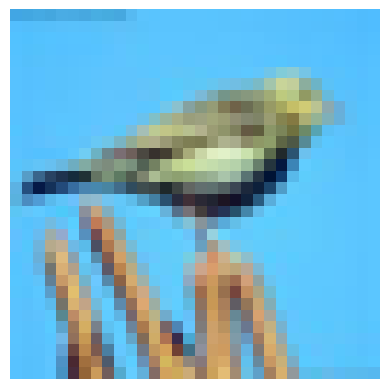

In [16]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

#plot a randomimage of our training data set
rnd_sample_idx = np.random.randint(len(test_loader))
#Add some text specifying what class does the image represent
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


In [ ]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [ ]:
def accuracy(model, loader):
# To do: Code your accuracy function
    pass

### Loop de entrenamiento

In [ ]:
def train(model, optimiser, epochs=100):

    #To do: program your training loop as previously

    pass

### Linear model

In [ ]:
# To do: Use PyTorch to create a linear model to have an initial baseline model

In [ ]:
train(model1, optimiser, epochs)

### Sequential CNN

In [ ]:
# To do: Use PyTorch to implement a CNN model, accuracy should be better than
#the linear model

In [ ]:
train(modelCNN1, optimiser, epochs)